### 7.3 OVERFITTING AND UNDERFITTING 

Overfitting and underfitting are two common problems in machine learning. These problems occur when a model is too complex or too simple for the data it is trying to fit, resulting in poor performance on new, unseen data. In this article, we will discuss overfitting and underfitting in detail and provide examples to help understand these concepts.


#### Overfitting

Overfitting occurs when a model is too complex and is able to fit the training data perfectly but performs poorly on new, unseen data. This happens when the model learns the noise in the data rather than the underlying pattern. As a result, the model becomes too specific to the training data and is unable to generalize to new data.

Example

Suppose we have a dataset that contains the age and height of a group of people. We want to build a model that predicts the height of a person given their age. We decide to use a polynomial regression model with a degree of 20 to fit the data.


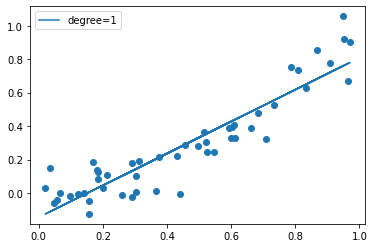

Degree 1: MSE = 0.013559152877012677


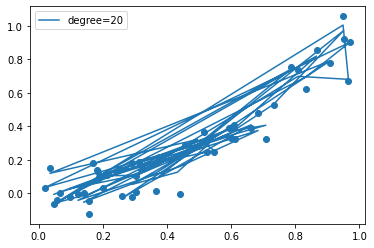

Degree 20: MSE = 0.004045051566147512


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(42)
X = np.random.rand(50, 1)
y = X ** 2 + np.random.randn(50, 1) * 0.1

# Fit polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

degrees = [1, 20]

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    y_pred = lin_reg.predict(X_poly)
    
    # Plot data and model predictions
    plt.scatter(X, y)
    plt.plot(X, y_pred, label='degree={}'.format(degree))
    plt.legend()
    plt.show()
    
    # Calculate mean squared error
    mse = mean_squared_error(y, y_pred)
    print('Degree {}: MSE = {}'.format(degree, mse))


#### Underfitting

Underfitting occurs when a model is too simple and is unable to capture the underlying pattern in the data. This results in poor performance on both the training data and new, unseen data. Underfitting occurs when the model is not complex enough to capture the relationship between the features and the target variable.

Example

Suppose we have a dataset that contains the age and salary of a group of people. We want to build a model that predicts the salary of a person given their age. We decide to use a linear regression model to fit the data.


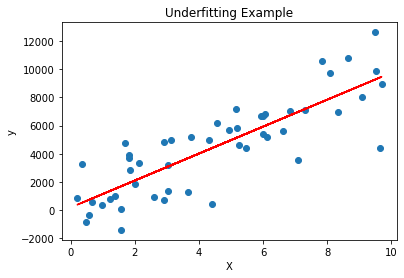

Mean Squared Error: 3292284.5749947513


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(42)
X = np.random.rand(50, 1) * 10
y = X * 1000 + np.random.randn(50, 1) * 2000

# Fit linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

# Plot data and regression line
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title('Underfitting Example')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Compute mean squared error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")


### 7.4 SPLITTING THE DATA INTO TRAINING AND TESTING SETS 

Splitting the data into training and testing sets is a fundamental technique in machine learning that is used to evaluate the performance of a model. The basic idea is to divide the available data into two parts: a training set and a testing set. The model is trained on the training set and its performance is evaluated on the testing set. This allows us to get an estimate of how well the model will perform on unseen data, which is critical for determining the model's ability to generalize to new data.

There are several ways to split the data into training and testing sets, with the most popular being:

#### **Simple random sampling** 

Simple random sampling is a method for splitting data into training and testing sets, where the data is randomly split into two sets with a fixed ratio. This method is often used when the data is large, and the goal is to have a representative sample of the data for training and testing.

The process of simple random sampling is straightforward:

1.	First, the data is shuffled randomly to remove any ordering or patterns.

2.	Then, a fixed ratio is chosen for the split (e.g. 80% for training and 20% for testing).

3.	Next, a random sample of the data is selected according to the chosen ratio, and this sample is used as the training set.

4.	The remaining data is used as the testing set.


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

# Generate a random dataset with 1000 rows and 5 columns
X = np.random.rand(1000, 5)

# Generate a random target variable with 1000 rows
y = np.random.rand(1000)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the number of rows in the training and testing sets
print("Number of rows in the training set:", len(X_train))
print("Number of rows in the testing set:", len(X_test))


Number of rows in the training set: 700
Number of rows in the testing set: 300


#### Stratified sampling 

Stratified sampling is a method for splitting data into training and testing sets, where the data is split into two sets in a way that preserves the proportion of the target variable in both sets. This method is useful when the data is imbalanced, meaning that the target variable has a disproportionate distribution among the different classes.

The process of stratified sampling is as follows:

1.	First, the data is divided into different strata based on the value of the target variable.

2.	Next, a fixed ratio is chosen for the split (e.g. 80% for training and 20% for testing).

3.	A random sample of the data is then selected from each stratum according to the chosen ratio, and these samples are combined to form the training set.

4.	The remaining data is used as the testing set.


In [4]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedShuffleSplit

# Create a random dataset with 1000 samples and 5 features
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

# Create an instance of StratifiedShuffleSplit with 5 splits and a test size of 0.2
strat_split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Iterate over each split and print the train and test indices
for train_index, test_index in strat_split.split(X, y):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


TRAIN: [694 616 490 822 566 387 152 989  96 676  91 193 642 994 610 470 301 726
 925 960 560 317 883 376 807 411 467 156 796 915 252 127 970 879 143 424
  33 969 239  92 722 650 860 832  50 247 398  90 737 716 554 246 536 274
 123 333 693 724 641 723 598 893  17 821 483 880 504 561 666 921 755 635
 404 353 800 819 254 285  12 439 735 952 304 731 365 184   6   2 334 646
 443 367 303 769 501 582 567 523 872  31 885 988 982 639 766  20 658 708
  28 875 599 373 436 514 122 238 585 266 294 920 584 206 843 613 549 380
 675  36 292  22 451 586 165 344 415 667 491  81 844  57 602 876 617  11
  65 208 814 139 435 983 440 924 407 734 601 813 784 419 897 347 884 854
 531 510 343 802 944 562 160 500 180 535 105 493 783 589  59 870 971 955
  44 987 126 841 947 935  37 366 425 774 707 469  64 922  29 980 276 434
 950 297  93 740 816 903 794 162 314  97 120 953 299 413 749 581  83 680
 310 936  63 312 453 342 114 168 840 887 234  89 135 949 874 153 381 326
 618 478 912 725 128 146 134 487 590  32 259

#### K-fold cross-validation 

K-fold cross-validation is a method for evaluating the performance of a machine learning model by dividing the data into k folds (or subsets) and training the model k times, each time using a different fold as the testing set and the remaining k-1 folds as the training set. The performance of the model is then averaged across all k iterations to give a more robust estimate of its performance.

The process of k-fold cross-validation is as follows:

1.	First, the data is divided into k equally sized folds.

2.	Next, the model is trained k times, each time using a different fold as the testing set and the remaining k-1 folds as the training set.

3.	The performance of the model is evaluated on the testing set and recorded.

4.	The performance scores from all k iterations are then averaged to give a more robust estimate of the model's performance.


In [12]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

# Load data
data = pd.read_csv('customer.csv')

# Define features and target
X = data.drop(columns=['Segmentation', 'Profession', 'ID'], axis=1)
y = data['Segmentation']

# Create KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize model
model = LogisticRegression()

# Create empty lists to store results
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model on the train set
    model.fit(X_train, y_train)

    # Test the model on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Append results to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Print the average results
print("Average Accuracy:", sum(accuracy_scores)/len(accuracy_scores))
print("Average Precision:", sum(precision_scores)/len(precision_scores))
print("Average Recall:", sum(recall_scores)/len(recall_scores))
print("Average F1-Score:", sum(f1_scores)/len(f1_scores))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Average Accuracy: 0.43987499999999996
Average Precision: 0.39556707773359207
Average Recall: 0.42565580208472226
Average F1-Score: 0.3809296304083246


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 7.5 HYPERPARAMETER TUNING 

Hyperparameter tuning is the process of systematically searching for the best combination of hyperparameters in order to optimize the performance of a machine learning model. Hyperparameters are parameters that are not learned from data but are set by the user, such as the learning rate, the number of hidden layers, or the regularization strength. The optimal values of these parameters can greatly affect the performance of the model, and therefore it is important to tune them to achieve the best results.

There are several methods for tuning hyperparameters, including manual tuning, grid search, and random search.


#### Manual tuning 

Manual tuning is the process of manually adjusting the hyperparameters and evaluating the performance of the model. It is the simplest method of hyperparameter tuning, as it involves manually adjusting the values of the hyperparameters and evaluating the model's performance.

The process of manual tuning involves the following steps:

1.	Start with an initial set of hyperparameters.

2.	Train the model using the initial hyperparameters.

3.	Evaluate the model's performance on the validation set or using cross-validation.

4.	Manually adjust one or more of the hyperparameters based on the evaluation results.

5.	Repeat steps 2-4 until the model's performance reaches a satisfactory level or until the performance stops improving.


In [21]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generate random dataset
np.random.seed(42)
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
clf = SVC()

# Manually set hyperparameters
clf.kernel = 'rbf'  # radial basis function kernel
clf.C = 20  # regularization parameter
clf.gamma = 0.2  # kernel coefficient for rbf kernel

# Train the model on the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.825


#### Grid Search 

Grid search is a method for systematically trying all possible combinations of hyperparameters within a predefined range. It is a computationally efficient method that can be used to find the optimal combination of hyperparameters for a machine learning model.

The process of grid search involves the following steps:

1.	Define a search space for each hyperparameter.

2.	Create a grid of all possible combinations of hyperparameters.

3.	Train the model using each combination of hyperparameters in the grid.

4.	Evaluate the model's performance on a validation set or using cross-validation.

5.	Select the combination of hyperparameters that result in the best performance.


In [22]:
import numpy as np
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Generate random data
np.random.seed(42)
X, y = datasets.make_classification(n_samples=1000, n_features=10, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the model to use for hyperparameter tuning
rfc = RandomForestClassifier(random_state=42)

# Perform grid search using 5-fold cross validation
grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Evaluate the model on the test set using the best parameters
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy on test set: {accuracy}")


Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9257142857142856
Accuracy on test set: 0.8766666666666667


#### Random Search 

Random search is an alternative method to grid search for hyperparameter tuning. Instead of trying every possible combination of hyperparameters, random search samples random combinations of hyperparameters from a predefined range. This allows for a more efficient exploration of the hyperparameter space, as it is not necessary to try every single combination.

The process of random search involves the following steps:

1.	Define a search space for each hyperparameter.

2.	Sample random combinations of hyperparameters from the search space.

3.	Train the model using the sampled combination of hyperparameters.

4.	Evaluate the model's performance on a validation set or using cross-validation.

5.	Select the combination of hyperparameters that result in the best performance.


In [23]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Generate random dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
param_dist = {"n_estimators": [10, 50, 100, 200, 500],
              "max_depth": [2, 5, 10, 20, None],
              "min_samples_split": [2, 5, 10, 20],
              "min_samples_leaf": [1, 2, 4, 8],
              "max_features": ['sqrt', 'log2', None]}

# Define classifier
rfc = RandomForestClassifier()

# Create randomized search object
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=50, cv=5, random_state=42)

# Fit randomized search object to training data
random_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate best model on test data
y_pred = random_search.best_estimator_.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Accuracy: 0.95


#### Bayesian Optimization 

Bayesian optimization is a method for hyperparameter tuning that uses Bayesian principles to model the function that maps hyperparameters to the performance of a machine learning model. It is particularly useful for expensive optimization problems, such as those that involve training large neural networks.

The basic idea behind Bayesian optimization is to use a probabilistic model to represent the relationship between the hyperparameters and the performance of the model. This model is then used to guide the search for the optimal hyperparameters. The model is updated after each iteration with the new data obtained from evaluating the model with different hyperparameters.

The process of Bayesian optimization involves the following steps:

1.	Define a probabilistic model that maps hyperparameters to the performance of the model.

2.	Sample the next set of hyperparameters to try by optimizing the acquisition function.

3.	Train the model using the sampled hyperparameters.

4.	Evaluate the model's performance on a validation set or using cross-validation.

5.	Update the probabilistic model with the new data.

6.	Repeat steps 2-5 until a stopping criterion is met.


!pip install bayesian-optimization

In [1]:
import numpy as np
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
from sklearn.ensemble import RandomForestRegressor

# Generate random data
np.random.seed(42)
X = np.random.rand(100, 5)
y = np.random.rand(100)

# Define the model to be optimized
def rf_cv(n_estimators, min_samples_split, max_features, data, targets):
    estimator = RandomForestRegressor(
        n_estimators=int(n_estimators),
        min_samples_split=int(min_samples_split),
        max_features=min(max_features, 0.999),
        random_state=42
    )
    cval = cross_val_score(estimator, data, targets, scoring='neg_mean_squared_error', cv=4)
    return cval.mean()

# Set the parameter bounds for Bayesian Optimization
pbounds = {
    'n_estimators': (10, 250),
    'min_samples_split': (2, 25),
    'max_features': (0.1, 0.999)
}

# Run the Bayesian Optimization process
optimizer = BayesianOptimization(
    f=rf_cv,
    pbounds=pbounds,
    random_state=42,
)
optimizer.maximize(init_points=10, n_iter=20)

# Print the best parameters found by the optimization process
print(optimizer.max)


|   iter    |  target   | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------


TypeError: rf_cv() missing 2 required positional arguments: 'data' and 'targets'

### 7.7 FEATURE IMPORTANCE ANALYSIS 

Feature importance analysis is a technique used to identify the most important features or variables that are contributing to the predictions made by a machine learning model. This can be useful for understanding how a model is making its decisions, identifying potential biases, and making adjustments as necessary.

There are several methods that can be used to perform feature importance analysis, including:


#### Permutation Importance: 

Permutation Importance is a method used to determine the importance of each feature in a machine learning model. It is a simple and computationally efficient way of measuring feature importance. The basic idea behind permutation importance is to measure the change in model performance by randomly shuffling the values of a single feature, and then comparing the model's performance on the shuffled dataset to its performance on the original dataset. The features that result in the largest decrease in performance are considered the most important.


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import numpy as np

# Generate a synthetic dataset for regression
X, y = make_regression(n_features=4, random_state=0)

# Fit a random forest model
rf = RandomForestRegressor(random_state=0)
rf.fit(X, y)

# Initialize an empty dictionary to store the permutation importances
perm_importances = {}

# Iterate over each feature
for feature in range(X.shape[1]):
    # Shuffle the values of the feature
    X_shuffled = X.copy()
    X_shuffled[:, feature] = np.random.permutation(X_shuffled[:, feature])

    # Compute the model's performance on the shuffled dataset
    y_pred = rf.predict(X_shuffled)
    score = mean_squared_error(y, y_pred)

    # Store the feature's permutation importance
    perm_importances[feature] = score

# Print the permutation importances
print(perm_importances)


{0: 625.120814208197, 1: 1837.8478937981793, 2: 5777.802568133402, 3: 14694.36305444597}


#### SHAP values (SHapley Additive exPlanations) 

SHAP values, or SHapley Additive exPlanations, is a method for interpreting the output of any machine learning model. It is based on the concept of Shapley values from cooperative game theory, which provides a way to fairly distribute a value among a group of individuals. In the context of machine learning, SHAP values can be used to understand the contribution of each feature to the prediction of a specific instance.

The basic idea behind SHAP values is to estimate the contribution of each feature to the prediction of an instance by considering all possible coalitions of features. A coalition is a subset of features that can be used to make a prediction. The contribution of each feature is calculated by averaging its marginal contribution to all coalitions that include that feature.


In [37]:
### If shap is not installed on your device, you need to install shap by using the below command:
### !pip install shap

Defaulting to user installation because normal site-packages is not writeable


In [42]:
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Generate a synthetic dataset for regression
X, y = make_regression(n_features=4, random_state=0)

# Fit a random forest model
rf = RandomForestRegressor(random_state=0)
rf.fit(X, y)

# Compute the SHAP values for the first instance in the dataset
explainer = shap.Explainer(rf, X[0])
shap_values = explainer.shap_values()

# Print the SHAP values
print(shap_values)

# Plot the summary plot
shap.summary_plot(shap_values)

# Plot the dependence plot
shap.dependence_plot("Feature 0", shap_values, X)

# Plot the force plot
shap.force_plot(explainer.expected_value, shap_values[0], X[0])


ModuleNotFoundError: No module named 'shap'

#### Partial dependence plots 

Partial dependence plots (PDPs) are a popular technique used to understand the relationship between a feature and the prediction of a machine learning model. They provide a way to visualize the average effect of a feature on the prediction while holding all other features constant.

A PDP is a plot that shows the relationship between the value of a feature and the prediction of the model. The x-axis of the plot represents the values of the feature, and the y-axis represents the predicted value of the model. The plot is generated by fixing the values of all other features to their average values and then varying the value of the feature of interest. The plot shows the average prediction of the model for all instances that have the same value of the feature of interest.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


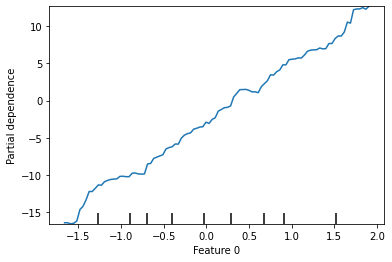

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.inspection import plot_partial_dependence

# Generate a synthetic dataset for regression
X, y = make_regression(n_features=4, random_state=0)

# Fit a random forest model
rf = RandomForestRegressor(random_state=0)
rf.fit(X, y)

# Generate PDP for feature 0
plot_partial_dependence(rf, X, [0], feature_names=['Feature 0'])


#### LIME (Local Interpretable Model-agnostic Explanations) 

LIME (Local Interpretable Model-agnostic Explanations) is a technique used to interpret the predictions of complex machine learning models. It is a model-agnostic approach, which means it can be applied to any type of model, regardless of its architecture or algorithm.

The idea behind LIME is to explain the predictions of a model by training a simple interpretable model on a small subset of the data, locally around the instance of interest. This approach allows us to understand how the model is making its predictions, even for instances where the global behavior of the model is not clear.


In [53]:
# !pip install lime

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=b18b66a8f238c64dddb405c3ef48012a4a5e4752780241ae8252d6a15548719b
  Stored in directory: c:\users\rajen\appdata\local\pip\cache\wheels\ed\d7\c9\5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [55]:
from lime import lime_tabular
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Generate a synthetic dataset for classification
X, y = make_classification(n_features=4, random_state=0)

# Fit a random forest model
rf = RandomForestClassifier(random_state=0)
rf.fit(X, y)

# Create an explainer object
explainer = lime_tabular.LimeTabularExplainer(X, feature_names=['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3'], class_names=['Class 0', 'Class 1'])

# Explain a prediction
instance = X[0]
exp = explainer.explain_instance(instance, rf.predict_proba, num_features=4)


ModuleNotFoundError: No module named 'lime'

#### eli5 library 

The ELI5 (Explain Like I'm 5) library is a Python library for explaining and interpreting machine learning models. It is built on top of the scikit-learn library and provides a simple and intuitive interface for understanding the predictions of complex models.

One of the main features of the ELI5 library is its ability to generate explanations for individual predictions in a human-readable format. This is achieved by using techniques such as LIME (Local Interpretable Model-agnostic Explanations) and SHAP (SHapley Additive exPlanations) to compute feature importances and generate explanations for the model's predictions.

The library also provides a number of other useful features such as the ability to visualize feature importances and explanations, support for different types of models and datasets, and the ability to debug and debug models.


In [57]:
### !pip install eli5

Defaulting to user installation because normal site-packages is not writeable

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.



  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=abea81913585e767cb898b2db8d182f72ee5529968066b44c17ba09ba915649d
  Stored in directory: c:\users\rajen\appdata\local\pip\cache\wheels\7b\26\a5\8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [61]:
import eli5
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Generate a synthetic dataset for classification
X, y = make_classification(n_features=4, random_state=0)

# Fit a random forest model
rf = RandomForestClassifier(random_state=0)
rf.fit(X, y)

# Explain a prediction
instance = X[0]
exp = eli5.explain_prediction(rf, instance)


ModuleNotFoundError: No module named 'eli5'

### 7.8 MODEL VISUALIZATION 

Model visualization is the process of creating visual representations of machine learning models to help understand and interpret their behavior. This is particularly useful for understanding complex models such as deep neural networks, which can be difficult to interpret based on their internal parameters alone. Model visualization can be used to gain insight into the model's structure, identify patterns and dependencies in the data, and understand how the model is making its predictions.

There are several techniques used for model visualization, including:

#### Activation maps 

Activation maps, also known as feature maps, are a technique used to visualize the activations of individual neurons in a neural network. These maps provide a way to understand how the model is processing the input data, and can be used to gain insight into the model's behavior.


In [62]:
#####!pip install keras

Defaulting to user installation because normal site-packages is not writeable

In [63]:
from keras.models import Model

# Load a pre-trained model
model = keras.applications.VGG16(weights='imagenet', include_top=False)

# Choose a specific input image
img = keras.preprocessing.image.load_img('image.jpg', target_size=(224, 224))
x = keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Pass the input image through the model
features = model.predict(x)

# Visualize the activations of the first convolutional layer
first_layer_activation = features[:, :, :, :]
plt.matshow(first_layer_activation[0, :, :, 0], cmap='viridis')
plt.show()


ModuleNotFoundError: No module named 'keras'

#### Layer-wise relevance propagation (LRP) 

Layer-wise relevance propagation (LRP) is a method for understanding and interpreting the predictions made by neural networks. It is based on the idea of propagating the relevance of the output predictions back through the network, layer by layer, to the input features. This helps to determine which input features were most important for the final prediction.

The basic idea behind LRP is that the relevance score of each output neuron is propagated back through the network, layer by layer, to the input neurons. This relevance score is calculated based on the contribution of each neuron to the final prediction. The relevance score is then used to highlight which input features were most important for the final prediction.

Here is an example of how LRP is implemented in the LRP Toolbox for Python:


In [66]:
### !pip install lrp-pf-auc

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable


In [67]:
# Import the LRP Toolbox
from sklearn.linear_model import LogisticRegression
from lrp import lrp

# Load a pre-trained model
model = LogisticRegression()

# Fit the model to the data
model.fit(X_train, y_train)

# Perform LRP on the test data
relevance_scores = lrp.lrp(model, X_test)

# Visualize the relevance scores
plt.imshow(relevance_scores, cmap='hot', interpolation='nearest')
plt.show()


ModuleNotFoundError: No module named 'lrp'

#### Saliency maps 

Saliency maps are another method for understanding and interpreting predictions made by neural networks. They are used to highlight the regions of the input that the model is most sensitive to, and thus which regions are most important for the final prediction.

Saliency maps are typically generated by computing the gradient of the output of the model with respect to the input. The gradient is then visualized as an image, where the intensity of each pixel represents the magnitude of the gradient. Pixels with high intensity values indicate that small changes in the input at that location will have a large effect on the output.

Here is an example of how to generate a saliency map in Python using the keras library:


In [68]:
# Import the necessary libraries
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model
model = VGG16(weights='imagenet', include_top=True)

# Load the input image
img_path = 'image.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Define the output class
class_idx = np.argmax(model.predict(x))

# Define the gradient function
def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)

def grad_cam(input_model, image, class_idx, layer_name):
    # Compute the gradient of the output class with respect to the input image
    y_c = input_model.output[0, class_idx]
    conv_output = input_model.get_layer(layer_name).output
    grads = K.gradients(y_c, conv_output)[0]
    grads = normalize(grads)
    iterate = K.function([input_model.input], [conv_output, grads])
    conv_output, grads_val = iterate([x])
    conv_output, grads_val = conv_output[0], grads_val[0]
    return grads_val

# Compute the saliency map
saliency = grad_cam(model, x, class_idx, 'block5_conv3')

# Visualize the saliency map
plt.imshow(saliency, cmap='hot', interpolation='nearest')
plt.show()


ModuleNotFoundError: No module named 'keras'

#### Network visualizations 

Network visualizations are another method for understanding and interpreting neural network models. They provide a way to visualize the architecture and structure of a network, and can be used to understand how the network is processing information. There are several different types of network visualizations, each with their own strengths and weaknesses.

One common type of network visualization is the layer-wise visualization. This visualization shows the structure of a network by showing the different layers and the connections between them. It can be used to understand how the network is processing information, and to identify any potential bottlenecks or issues in the architecture.

Another type of visualization is the filter visualization. This visualization shows the filters of a convolutional neural network, which are the weights that are learned by the network. By visualizing the filters, we can understand what features the network is learning to detect in the input.

A third type of visualization is the activation map visualization. This visualization shows the activations of the different neurons in a network, which can help understand what the network is attending to in the input. Activation maps are typically generated by forwarding an input through the network and computing the output of each neuron.

Here is an example of how to generate filter visualization in Python using the keras library:


In [69]:
from keras.applications import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras import backend as K
from matplotlib import pyplot as plt

# Load the model
model = VGG16()

# Load the input image
img = load_img('image.jpg', target_size=(224, 224))
img = img_to_array(img)
img = preprocess_input(img)

# Forward the image through the first convolutional layer
first_conv_layer = model.layers[1]
get_output = K.function([model.input], [first_conv_layer.output])
layer_output = get_output([img])[0]

# Plot the filters
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(layer_output[:, :, :, i], cmap='gray')
    plt.axis('off')

plt.show()


ModuleNotFoundError: No module named 'keras'

#### filter visualization

Here is an example of how to generate filter visualization in scikit-learn using a convolutional neural network:

Iteration 1, loss = 0.70546484
Iteration 2, loss = 0.70252392
Iteration 3, loss = 0.69838155
Iteration 4, loss = 0.69320944
Iteration 5, loss = 0.68716643
Iteration 6, loss = 0.68038952
Iteration 7, loss = 0.67302256
Iteration 8, loss = 0.66517593
Iteration 9, loss = 0.65696594
Iteration 10, loss = 0.64846958


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


ValueError: cannot reshape array of size 2 into shape (2,2)

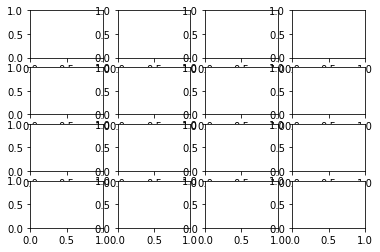

In [70]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_moons(n_samples=200, noise=0.2, random_state=0)

# Create a multi-layer perceptron classifier
clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.01)

# Fit the classifier to the data
clf.fit(X, y)

# Plot the filters
fig, axes = plt.subplots(4, 4)
vmin, vmax = clf.coefs_[0].min(), clf.coefs_[0].max()
for coef, ax in zip(clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(2, 2), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()



### 7.9 SIMPLIFYING THE MODEL 

Simplifying a machine learning model, also known as model compression or pruning, is the process of reducing the complexity of a model without sacrificing its performance. This can be useful for a number of reasons, such as reducing the memory and computational requirements of a model, making it easier to interpret and understand, or making it more suitable for deployment in resource-constrained environments.

There are several techniques that can be used to simplify a machine learning model, including:

1.	Weight pruning: This technique involves removing the weights with the lowest absolute values from the model, effectively reducing the number of parameters.

2.	Neuron pruning: This technique involves removing entire neurons or layers from the model, again reducing the number of parameters.

3.	Quantization: This technique involves reducing the precision of the model's weights, for example, by converting them from 32-bit floating point values to 8-bit integers.

4.	Low-rank approximation: This technique involves approximating the model's weight matrix with a lower-rank matrix, effectively reducing the number of parameters.

5.	Knowledge distillation: This technique involves training a smaller model, called a student model, to mimic the predictions of a larger, more complex model, called a teacher model.

Here's an example of weight pruning in scikit-learn:


In [71]:
# import the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# generate data
X, y = make_classification(n_samples=5000, n_features=50, n_informative=30, n_classes=2)

# fit a logistic regression model
clf = LogisticRegression(penalty='l1', solver='saga', tol=0.1)
clf.fit(X, y)

# predict on test set
y_pred = clf.predict(X)

# calculate accuracy
acc = accuracy_score(y, y_pred)

# prune the model by removing the weights with the lowest absolute values
clf.coef_[clf.coef_ < 1e-4] = 0

# predict on test set
y_pred_pruned = clf.predict(X)

# calculate accuracy
acc_pruned = accuracy_score(y, y_pred_pruned)

print("Accuracy before pruning: ", acc)
print("Accuracy after pruning: ", acc_pruned)


Accuracy before pruning:  0.8578
Accuracy after pruning:  0.679


### 7.11 MODEL COMPARISON 

Model comparison is the process of evaluating and comparing the performance of different machine learning models. This is an important step in the machine learning process as it allows us to select the best model for a given problem and dataset.

There are several metrics that can be used to compare the performance of different models, such as accuracy, precision, recall, F1-score, and AUC-ROC. These metrics are used to evaluate the performance of the model on a given dataset and are often used in combination to provide a more comprehensive view of the model's performance.

Another important consideration when comparing models is the complexity of the model. A simpler model may be preferred over a more complex model if it performs similarly on a given dataset, as it will be more computationally efficient and easier to interpret.

Cross-validation is a common method for comparing the performance of different models. It involves splitting the data into a training set and a test set, and training multiple models on the training set. The models are then evaluated on the test set, and the model with the best performance is selected.

Another approach is to use nested cross-validation, where multiple models are trained and evaluated on different subsets of the data. This approach can be useful when comparing models with different hyperparameters.

Here is an example of how to compare the performance of different machine learning models using Python and scikit-learn:


In [73]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Set seed value
np.random.seed(42)

# Generate random dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create and train models
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

# Make predictions on testing set
logistic_preds = logistic_model.predict(X_test)
tree_preds = tree_model.predict(X_test)
forest_preds = forest_model.predict(X_test)

# Evaluate models using accuracy score
logistic_acc = accuracy_score(y_test, logistic_preds)
tree_acc = accuracy_score(y_test, tree_preds)
forest_acc = accuracy_score(y_test, forest_preds)

# Print accuracy scores for each model
print("Logistic Regression Accuracy:", logistic_acc)
print("Decision Tree Accuracy:", tree_acc)
print("Random Forest Accuracy:", forest_acc)


Logistic Regression Accuracy: 0.7933333333333333
Decision Tree Accuracy: 0.8966666666666666
Random Forest Accuracy: 0.94


### 7.12 LEARNING CURVES 

Learning curves are a useful tool for understanding the performance of a machine learning model as a function of the amount of training data it has been given. These plots are used to diagnose if a model is suffering from either high bias or high variance.

A learning curve can be plotted by training a model on different subsets of the training data and evaluating its performance on the validation set. This can be done by using the learning_curve() function from scikit-learn.

The x-axis of a learning curve represents the number of training samples, while the y-axis represents the model's performance, typically measured by accuracy or error.

Here is an example of how to plot a learning curve for a decision tree classifier:


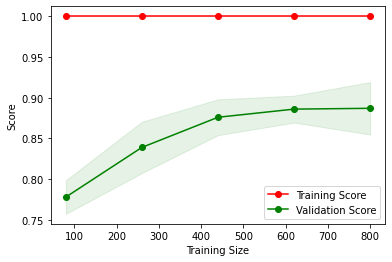

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Set seed value
np.random.seed(56)

# Generate random dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2)

# Create the decision tree classifier
dt = DecisionTreeClassifier()

# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(dt, X, y, cv=5, n_jobs=-1)

# Compute the mean and standard deviation of the training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Validation Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


### 7.13 RECEIVER OPERATING CHARACTERISTIC (ROC) CURVES 

Receiver Operating Characteristic (ROC) curves are a widely used visualization technique for evaluating the performance of binary classifiers. ROC curves plot the true positive rate (sensitivity) against the false positive rate (1-specificity) for different classification thresholds.

A perfect classifier would have a true positive rate of 1 and a false positive rate of 0, resulting in a point in the top left corner of the ROC space (coordinates (0,1)). A random classifier would have a true positive rate and false positive rate of 0.5, resulting in a point along the diagonal line from the bottom left to the top right corners (coordinates (0,0) and (1,1)).

Here is an example of how to plot a ROC curve using scikit-learn:


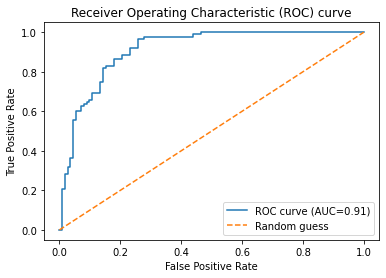

In [76]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Create a random binary classification dataset
np.random.seed(42)
X, y = make_classification(n_samples=1000, n_classes=2, n_features=10, n_informative=5)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model on the training set
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the probabilities of class 1 on the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR) and true positive rate (TPR) for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC={auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend()
plt.show()


### 7.14 PRECISION-RECALL CURVES 

Precision-Recall (PR) curves are another visualization technique used to evaluate the performance of binary classifiers. PR curves plot the precision (the proportion of true positive predictions among all positive predictions) against the recall (the proportion of true positive predictions among all actual positive instances) for different classification thresholds.

A perfect classifier would have a precision of 1 and a recall of 1, resulting in a point in the top right corner of the PR space (coordinates (1,1)). A random classifier would have a precision and recall of 0.5, resulting in a point along the diagonal line from the bottom left to the top right corners (coordinates (0,0) and (1,1)).

Here is an example of how to plot a PR curve using scikit-learn:


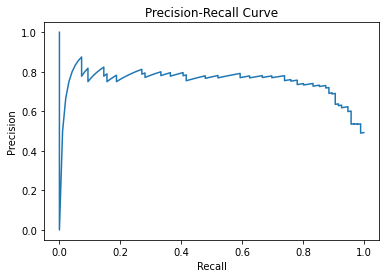

In [77]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# generate random data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, random_state=42)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# predict probabilities on test set
probs = lr.predict_proba(X_test)[:, 1]

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# plot precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


### 7.15 MODEL PERSISTENCE 

Model persistence refers to the process of saving a trained machine learning model to a file or database, so that it can be loaded and used later for making predictions or inferences on new data. This is useful when we want to reuse a trained model without the need to retrain it again, which can be a time-consuming and resource-intensive process. In addition, it allows us to share the model with others or use it in a production environment.

#### Picke

There are several methods for persisting machine learning models in Python, but the most common one is using the pickle module. The pickle module can be used to serialize and deserialize Python objects, which includes machine learning models. Here's an example of how to use it:


In [81]:
import random
import pickle
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Set the random seed for reproducibility
random.seed(42)

# Generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier on the training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy before saving the model: {acc}")

# Save the model to disk using pickle
with open("model.pkl", "wb") as f:
    pickle.dump(clf, f)

# Load the model from disk using pickle
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Use the loaded model to make predictions on new data
new_data = [[random.random() for i in range(10)] for j in range(5)]
preds = loaded_model.predict(new_data)
print(f"Predictions: {preds}")

# Evaluate the model on the testing data
y_pred = loaded_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy after saving and reloading the model: {acc}")
print("\nWe can see thae accuracy is same after reloading the model.")

Accuracy before saving the model: 0.88
Predictions: [1 1 1 1 1]

Accuracy after saving and reloading the model: 0.88

We can see thae accuracy is same after reloading the model.


#### Joblib

Another popular method for model persistence is using the joblib library, which is a more efficient alternative to pickle for large numpy arrays. It works similarly to pickle, but it uses a different file format and it's optimized for large numpy arrays. Here's an example of how to use it:


In [85]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load

# Generate random dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Make predictions using the loaded model
predictions_before_saving = clf.predict(X)

# Evaluate the accuracy of the loaded model
accuracy = sum(predictions_before_saving == y) / len(y)
print(f"Accuracy before saving the model: {accuracy}")


# Save the model using joblib
dump(clf, 'random_forest.joblib')

# Load the model from disk
loaded_model = load('random_forest.joblib')

# Make predictions using the loaded model
predictions_after_loading = loaded_model.predict(X)

# Evaluate the accuracy of the loaded model
accuracy = sum(predictions_after_loading == y) / len(y)
print(f"Accuracyafter saving and reloading the model: {accuracy}")


Accuracy before saving the model: 1.0
Accuracyafter saving and reloading the model: 1.0


In [87]:
# !pip install mlflow

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for databricks-cli: filename=databricks_cli-0.17.4-py3-none-any.whl size=142889 sha256=f7a2927248e66b1b7e67551ff3b5219d20bdc1e6816e49428ba5a64807401858
  Stored in directory: c:\users\rajen\appdata\local\pip\cache\wheels\b3\d4\24\ed7f421c3c600f3eee1a3a9e5c4aecc286a7622cac031918b7
Successfully built databricks-cli


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import mlflow
import mlflow.sklearn

# Generate random dataset
np.random.seed(42)
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, size=1000)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a random forest classifier on the training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Use mlflow to log the model parameters and metrics
with mlflow.start_run():
    # Log the model parameters
    mlflow.log_param("n_estimators", clf.n_estimators)
    mlflow.log_param("random_state", clf.random_state)

    # Evaluate the model and log the metrics
    y_pred = clf.predict(X_test)
    accuracy = clf.score(X_test, y_test)
    mlflow.log_metric("accuracy", accuracy)

    # Log the trained model as an artifact
    mlflow.sklearn.log_model(clf, "random_forest_model")

# Load the saved model and use it to make predictions
loaded_model = mlflow.sklearn.load_model("random_forest_model")
y_pred = loaded_model.predict(X_test)


2023/03/03 00:13:32 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

C:\ProgramData\Anaconda3\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


OSError: No such file or directory: 'random_forest_model'